# PCA(Principal Component Analysis) on MNIST Dataset

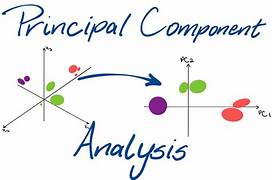

# 1. load Python Modules

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Read the Dataset using Pandas

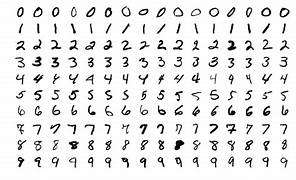

In [70]:
df = pd.read_csv('mnist_train.csv')
print("the shape of data is :", df.shape)
df.head()

the shape of data is : (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Load Image and Check

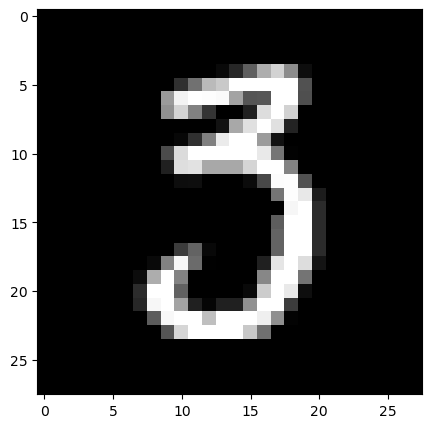

3


In [71]:
label = df['label']
y = label
df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 42000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

In [72]:
df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

# 4. StandardScaler

In [73]:
X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 5. Use PCA to reduce dimensions

In [74]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(42000, 154)

In [75]:
pca.explained_variance_ratio_

array([0.09748938, 0.07160266, 0.06145903, 0.05379302, 0.04894262,
       0.04303214, 0.03277051, 0.02892103, 0.02766902, 0.02348871,
       0.02099325, 0.02059001, 0.01702553, 0.01692787, 0.01581126,
       0.0148324 , 0.01319688, 0.01282727, 0.01187976, 0.01152755,
       0.01072191, 0.01015199, 0.00964902, 0.00912846, 0.00887641,
       0.00838766, 0.00811856, 0.00777406, 0.00740635, 0.00686661,
       0.00657982, 0.00638799, 0.00599367, 0.00588913, 0.00564335,
       0.00540967, 0.00509222, 0.00487505, 0.00475569, 0.00466545,
       0.00452952, 0.00444989, 0.00418255, 0.00397506, 0.00384542,
       0.00374919, 0.00361013, 0.00348522, 0.00336488, 0.00320738,
       0.00315467, 0.00309146, 0.00293709, 0.00286541, 0.00280759,
       0.00269618, 0.00265831, 0.00256299, 0.00253821, 0.00246178,
       0.00239716, 0.0023874 , 0.00227591, 0.00221518, 0.00213934,
       0.00206133, 0.00202851, 0.00195977, 0.00193639, 0.00188485,
       0.00186751, 0.0018167 , 0.00176891, 0.00172592, 0.00166

In [76]:
pca.n_components_

154

# 6. Train Test Split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 7. Model - LogisticRegression

In [78]:
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [79]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model - Logistic Regression
accuracy train score overall : 0.9311904761904762
accuracy test score overall : 0.9176190476190477
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.92      0.90      0.91       846
           3       0.92      0.89      0.90       937
           4       0.92      0.92      0.92       839
           5       0.84      0.87      0.85       702
           6       0.92      0.96      0.94       785
           7       0.94      0.92      0.93       893
           8       0.90      0.88      0.89       835
           9       0.89      0.90      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

[[785   0   3   0   2  12   9   2   2   1]
 [  0 892   1   2   1   4   1   2   6   0]
 [  6  10 758  10  10  10  1

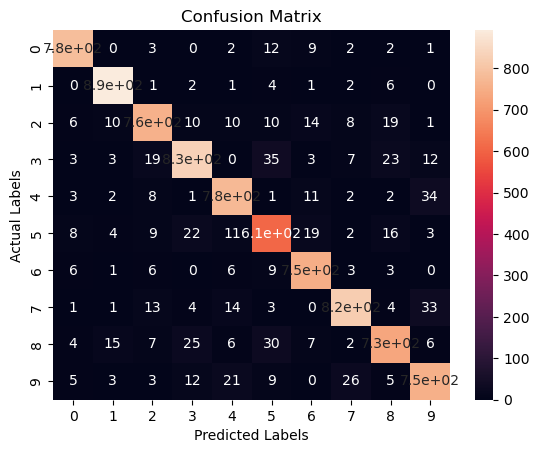

In [80]:
print("Model - Logistic Regression")
score = lg_model.score(X_train, y_train)
print('accuracy train score overall :', score)

score = lg_model.score(X_test, y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)

# 8. Conclusion

# Explored PCA Concepts - Applied on MNIST dataset